In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Evaluate the Performance of a Model

###  Gettting the data


In [3]:
path = '../_my_work_/X_opening.csv'
y = pd.read_csv(path)['worldwide_gross']
x = pd.read_csv(path).drop('worldwide_gross', axis = 1)

In [4]:
x.head(3)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,77025481.0,3452.0
1,300000000.0,2007.0,2.35,169.0,48350.0,300000000.0,7.1,139802190.0,4362.0
2,300000000.0,2015.0,2.35,148.0,11700.0,245000000.0,6.8,70403148.0,3929.0


In [5]:
x.shape , y.shape

((2221, 9), (2221,))

### Choosing Train and Test Data

#### Spliting Data with model_selection

In [6]:
from sklearn.model_selection import train_test_split

#Add a parameter to function train_test_split so it always delivers the same data partition (Not random)
#parameter:  random_state = number
#number is an integer; so, to have same results it has to be used the same number.

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 1)

In [7]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x,y, random_state = 1)

In [8]:
x_train.head(5)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
1724,20000000.0,2004.0,1.85,99.0,1189.0,40000000.0,4.8,6160886.0,2445.0
2027,14000000.0,1998.0,2.35,99.0,3500.0,14000000.0,5.5,10515444.0,2257.0
1843,18000000.0,2008.0,2.35,98.0,2215.0,18000000.0,5.1,300000.0,482.0
470,72000000.0,2001.0,2.35,116.0,14780.0,72000000.0,4.5,12174504.0,2905.0
1225,31000000.0,2012.0,2.35,138.0,20952.0,31000000.0,7.3,24900566.0,1884.0


In [9]:
x2_train.head(5)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
1724,20000000.0,2004.0,1.85,99.0,1189.0,40000000.0,4.8,6160886.0,2445.0
2027,14000000.0,1998.0,2.35,99.0,3500.0,14000000.0,5.5,10515444.0,2257.0
1843,18000000.0,2008.0,2.35,98.0,2215.0,18000000.0,5.1,300000.0,482.0
470,72000000.0,2001.0,2.35,116.0,14780.0,72000000.0,4.5,12174504.0,2905.0
1225,31000000.0,2012.0,2.35,138.0,20952.0,31000000.0,7.3,24900566.0,1884.0


In [10]:
#Verify if random_state = 1 displays the same data partition

pd.DataFrame.equals(x_train, x2_train)

True

### Cross Validation Partition

Divide the full data set in $N$ different partitions. Then, choose the $N_i$ partition as the target ($x_i$, $y_i$), and, use the others to train the model. Thereafter, move to other $N_{j \neq i}$ partitions of the **x** dataframe and use it as a new targer, then, train the model. Afterwards, repeat the same process $i$ times, one per partition with all $N_{k \neq i}$.

It means, you will have $i$ different __scores__ for each training step. So, a better score is the mean of all. 

In [11]:
#Implementation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

#Number of partitions to split the data
n_partitions = 5
#Type of scoring that I want (error of the model)
error = 'r2'
#Computing the scores using the Linear model Lasso() to train the data
scores = cross_val_score(Lasso(), x, y, cv = n_partitions, scoring = error)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4819915158581985e+18, tolerance: 8653617519237809.0
  positive)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.214750477948416e+18, tolerance: 8440297367866622.0
  positive)


In [12]:
scores

array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894])

In [13]:
# mean of scores

scores.mean()

0.44964021745791777

##### Comparison with One single traininf Split

In [14]:
model = Lasso()
model.fit(x_train,y_train)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.087692647754195e+18, tolerance: 7479170615554818.0
  positive)


Lasso()

In [15]:
model.score(x_test,y_test)

0.792619029496336

# Model Selection

In [16]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\pc\anaconda3\lib\site-packages (0.23.0)


### Function to get more info from cross validation

In [17]:
from sklearn.model_selection import cross_validate

In [18]:
results = cross_validate(Lasso(),x,y, return_train_score = True, cv=5)
results

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4819915158581985e+18, tolerance: 8653617519237809.0
  positive)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.214750477948416e+18, tolerance: 8440297367866622.0
  positive)


{'fit_time': array([0.0039885 , 0.00498629, 0.01296425, 0.00498629, 0.01296496]),
 'score_time': array([0.00199509, 0.00199437, 0.00199461, 0.00199485, 0.00099754]),
 'test_score': array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894]),
 'train_score': array([0.68988012, 0.77004932, 0.76604995, 0.76123379, 0.75837599])}

In [19]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.7491178363039035
0.44964021745791777


 Lasso model have a bias becouse scores of training are 0.75

## Using an Other Model

### Close Neighbors

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
cross_validate(KNeighborsRegressor(), x,y,return_train_score = True,cv=5)

{'fit_time': array([0.01093388, 0.00498676, 0.00594759, 0.00404596, 0.00500298]),
 'score_time': array([0.00498629, 0.00495124, 0.00498605, 0.004987  , 0.00299239]),
 'test_score': array([0.3647382 , 0.59274527, 0.21545625, 0.15143495, 0.25635077]),
 'train_score': array([0.73553883, 0.78647652, 0.78386739, 0.77876542, 0.77477287])}

In [22]:
#Set parameter: number of neighbors
cross_validate(KNeighborsRegressor(n_neighbors=10), x,y,return_train_score = True,cv=5)

{'fit_time': array([0.00698113, 0.00398946, 0.00500822, 0.0049305 , 0.00498867]),
 'score_time': array([0.00502634, 0.00499153, 0.00498414, 0.00502276, 0.00398636]),
 'test_score': array([0.23553954, 0.61921355, 0.24881301, 0.1209604 , 0.2466995 ]),
 'train_score': array([0.67830521, 0.76365722, 0.76231726, 0.75701303, 0.75061953])}

### Validation Curves & Learning Curves

#### Validation Curves 

In [24]:
#Validation Curve 
#Values to give to Parameters: number of neighbors
n = np.arange(2,50,2)

In [25]:
from sklearn.model_selection import validation_curve

#Choose the parameter you want to vary in parameter:
#param_name
#give values to param_name in:
#param_range

train_scores, test_scores = validation_curve(KNeighborsRegressor(),
                                             x,
                                             y,
                                             param_name='n_neighbors',
                                             param_range=n,
                                             cv=5)

In [26]:
train_scores

array([[0.85254787, 0.87500249, 0.87361899, 0.87096664, 0.86944354],
       [0.76258234, 0.80362711, 0.80107876, 0.79649437, 0.79225826],
       [0.71882872, 0.77528919, 0.77290638, 0.76735431, 0.76232037],
       [0.68629696, 0.77062676, 0.76985196, 0.76407441, 0.75829891],
       [0.67830521, 0.76365722, 0.76231726, 0.75701303, 0.75061953],
       [0.66669119, 0.75639535, 0.75224453, 0.74815962, 0.74071023],
       [0.65480296, 0.74891959, 0.74648058, 0.74378262, 0.73531718],
       [0.64772202, 0.74008013, 0.73888781, 0.73626996, 0.72603174],
       [0.63936836, 0.73593265, 0.73519762, 0.73104469, 0.72255579],
       [0.63264888, 0.73410524, 0.73254544, 0.72913498, 0.72038171],
       [0.62426297, 0.73376047, 0.73130737, 0.72761135, 0.7192313 ],
       [0.61965019, 0.73181725, 0.72943231, 0.72617578, 0.71804593],
       [0.61578387, 0.72891082, 0.72651615, 0.72246403, 0.71505758],
       [0.6119936 , 0.72401826, 0.72211091, 0.718668  , 0.71028635],
       [0.60667711, 0.7208691 , 0.

In [27]:
#Average over columns
np.mean(train_scores,axis=1)

array([0.86831591, 0.79120817, 0.7593398 , 0.7498298 , 0.74238245,
       0.73284018, 0.72586058, 0.71779833, 0.71281982, 0.70976325,
       0.70723469, 0.70502429, 0.70174649, 0.69741543, 0.69379214,
       0.69163113, 0.68955146, 0.6862285 , 0.68321376, 0.68018032,
       0.67885534, 0.67522056, 0.67135123, 0.66953759])

In [28]:
np.mean(train_scores,axis=1).shape

(24,)

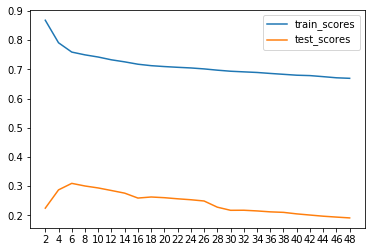

In [32]:
#Plot the scores behaivior
plt.plot(np.mean(train_scores,axis=1))
plt.plot(np.mean(test_scores,axis=1))
#set x scale: 
plt.xticks(np.arange(24),n)
plt.legend(['train_scores','test_scores'])

#### Learning Curves

In [35]:
from sklearn.model_selection import learning_curve

lc = learning_curve(KNeighborsRegressor(n_neighbors=6),x,y,cv=5)
samples, train, test = lc[0] , lc[1], lc[2]

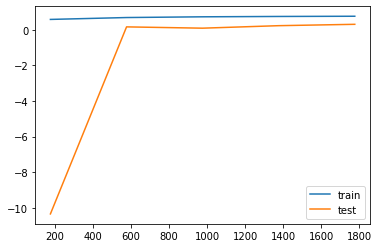

In [39]:
#R2 errors plot
plt.plot(samples,np.mean(train,axis=1))
plt.plot(samples,np.mean(test,axis=1))
plt.legend(['train','test'])

In [40]:
samples

array([ 177,  577,  976, 1376, 1776])

In [ ]:
#Plot without first data

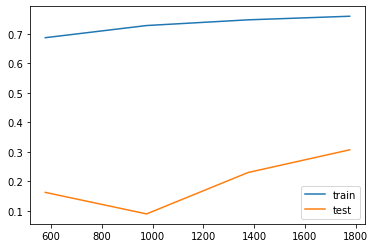

In [41]:
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:])
plt.legend(['train','test'])